By: **Abdelrhaman Sayed** 

## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# **Data Description**

The data contains of two columns 


1.   Hours: the numbers of hours they studied 
2.   scores: scores of students



## **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [45]:
## Reading dataset
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **EDA**

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
#checking null values 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.duplicated().sum()

0

Data correlation: Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **checking outliers**

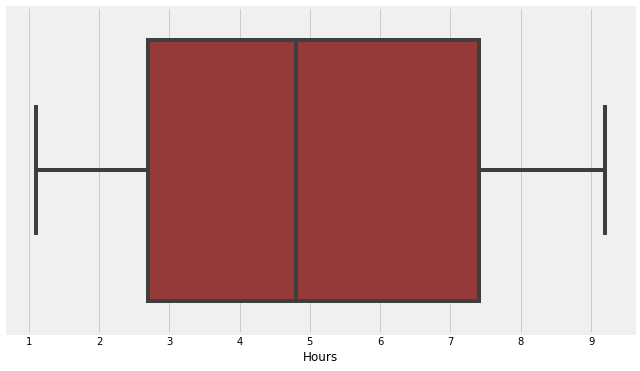

In [9]:

plt.figure(figsize=(10,6))
sns.boxplot(df['Hours'],color='brown')

# **Numerical distribution**

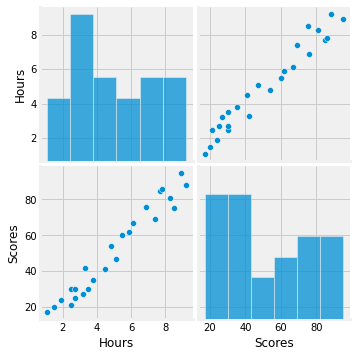

In [10]:
sns.pairplot(df)

hint : form the gragh above, there is a high positive correlation between the number of hours studied and percentage score  



# **Splitting the dataset into the Training set and Test set**

In [36]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
# x = x.reshape(-1,1)
# y = y.reshape(-1,1)

# **Training and Testing**

In [37]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(x_train,y_train)
prediction = model.predict(x_test)
prediction

array([83.18814104, 27.03208774, 27.03208774, 69.63323162, 59.95115347])

In [39]:
print("model performace on train data: ", model.score(x_train,y_train))
print("model performance on test data: ", model.score(x_test,y_test))

model performace on train data:  0.9491209376364416
model performance on test data:  0.9678055545167994


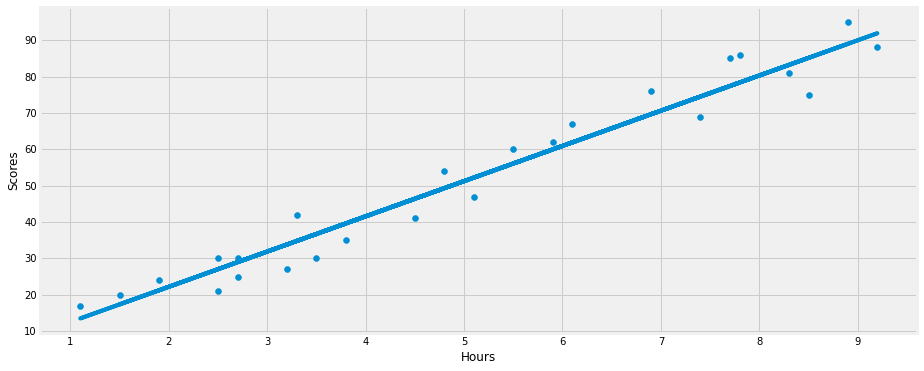

In [46]:
#Plotting regression line 
best_fit_line = model.coef_*x+model.intercept_
plt.figure(figsize=(14,6))
plt.scatter(x,y)
plt.plot(x,best_fit_line)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#  **What will be the predicted score if a student studies for 9.25 hrs/day?**





In [43]:
hours = 9.25 
needed_prediction = model.predict(np.array([hours]).reshape(-1,1))
print("predicted score {}".format(needed_prediction[0]))

predicted score 92.38611528261494


# **Evaluation**

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error, mean_absolute_error

print('Root mean square error: ', mean_squared_error(y_test,prediction, squared=False))
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))
print("mean absolute percentage error: " , mean_absolute_percentage_error(y_test,prediction))


Root mean square error:  4.352380006653288
Mean Absolute Error: 3.9207511902099244
mean absolute percentage error:  0.10600118977553538
